In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

from NEExT.collections import EgonetCollection
from NEExT.io import GraphIO
from NEExT.datasets import GraphDataset

%reload_ext autoreload
%autoreload 2

In [16]:
from NEExT.outliers.benchmark_utils.data_loading import load_abcdo_data, load_pygod_data
from NEExT.outliers.benchmark_utils.embed import build_features
from NEExT.outliers.benchmark_utils.embed import build_embeddings
from NEExT.outliers.benchmark_utils.supervised import supervised_eval

graph_io = GraphIO()
hide_frac = {0: 0.8, 1: 0.8}
k_hop = 1

# edges_df, mapping_df, features_df, ground_truth_df = load_pygod_data(hide_frac=hide_frac)
edges_df, mapping_df, features_df, ground_truth_df = load_abcdo_data(hide_frac=hide_frac)

graph_data = {
    "target": "is_outlier",
    "skip_features": ['random_community_feature', 'community_id'],
    "feature_list": [],
    # "feature_list": [i for i in features_df.columns[1:-1]],
}

In [17]:
from NEExT.features.structural_node_features import StructuralNodeFeatures


graph_collection = graph_io.load_from_dfs(
    edges_df=edges_df,
    node_graph_df=mapping_df,
    node_features_df=features_df,
    graph_type="igraph",
    filter_largest_component=False,
)
structural_node_features = StructuralNodeFeatures(
    graph_collection=graph_collection,
    feature_list=["all"],
    feature_vector_length=8,
    n_jobs=4,
    show_progress=False,
    suffix='global'
).compute()
graph_collection.add_node_features(structural_node_features.features_df)

In [18]:
egonet_collection = EgonetCollection(egonet_feature_target='is_outlier', skip_features=graph_data['skip_features'])
egonet_collection.compute_k_hop_egonets(graph_collection, k_hop)
# egonet_collection.compute_leiden_egonets(graph_collection)
structural_features, features = build_features(egonet_collection, feature_vector_length=k_hop, feature_list=structural_node_features.feature_columns)

In [19]:
embeddings = build_embeddings(
    egonet_collection,
    structural_features,
    features,
    strategy="feature_embeddings",
    embeddings_dimension=5,
    embeddings_algorithm="approx_wasserstein",
    # approx_wasserstein, wasserstein, sinkhornvectorizer
)
dataset = GraphDataset(egonet_collection, embeddings, standardize=False)

In [20]:
model = "lgbm"
out_df, score = supervised_eval(model, ground_truth_df, dataset)
score

[I 2025-04-05 17:01:58,844] A new study created in memory with name: no-name-3bfdca4b-1122-4ddc-a93f-db718da9a8c3
[I 2025-04-05 17:01:58,902] Trial 0 finished with value: 0.709375 and parameters: {'n_estimators': 31, 'min_data_in_leaf': 1, 'num_leaves': 58, 'max_depth': 76, 'class_weight': 'balanced', 'learning_rate': 0.9795888331640726, 'colsample_bytree': 0.3827372024429185}. Best is trial 0 with value: 0.709375.
[I 2025-04-05 17:01:58,927] Trial 3 finished with value: 0.5 and parameters: {'n_estimators': 57, 'min_data_in_leaf': 10, 'num_leaves': 38, 'max_depth': 97, 'class_weight': 'balanced', 'learning_rate': 0.013395593365142787, 'colsample_bytree': 0.23851905793307138}. Best is trial 0 with value: 0.709375.
[I 2025-04-05 17:01:58,943] Trial 2 finished with value: 0.675 and parameters: {'n_estimators': 16, 'min_data_in_leaf': 2, 'num_leaves': 28, 'max_depth': 17, 'class_weight': 'balanced', 'learning_rate': 5.119346575789193, 'colsample_bytree': 0.3849509908786324}. Best is trial 

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Warning] No further splits with positiv

[I 2025-04-05 17:01:59,161] Trial 10 finished with value: 0.5 and parameters: {'n_estimators': 4, 'min_data_in_leaf': 2, 'num_leaves': 63, 'max_depth': 35, 'class_weight': None, 'learning_rate': 0.004028895978492379, 'colsample_bytree': 0.4986269676629723}. Best is trial 0 with value: 0.709375.
[I 2025-04-05 17:01:59,187] Trial 12 finished with value: 0.771875 and parameters: {'n_estimators': 52, 'min_data_in_leaf': 9, 'num_leaves': 63, 'max_depth': 46, 'class_weight': None, 'learning_rate': 0.33261375689245054, 'colsample_bytree': 0.7707914505019711}. Best is trial 12 with value: 0.771875.
[I 2025-04-05 17:01:59,190] Trial 11 finished with value: 0.684375 and parameters: {'n_estimators': 5, 'min_data_in_leaf': 8, 'num_leaves': 43, 'max_depth': 42, 'class_weight': 'balanced', 'learning_rate': 1.676708951122534, 'colsample_bytree': 0.39342684004284545}. Best is trial 12 with value: 0.771875.


[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 24, number of negative: 96
Did not meet early stopping. Best iteration is:
[1]	valid_0's auc: 0.847656
[LightGBM] [Inf

[I 2025-04-05 17:01:59,295] Trial 13 finished with value: 0.696875 and parameters: {'n_estimators': 34, 'min_data_in_leaf': 1, 'num_leaves': 100, 'max_depth': 60, 'class_weight': None, 'learning_rate': 0.11624955157114163, 'colsample_bytree': 0.6555718296294308}. Best is trial 12 with value: 0.771875.
[I 2025-04-05 17:01:59,439] Trial 14 finished with value: 0.81875 and parameters: {'n_estimators': 29, 'min_data_in_leaf': 7, 'num_leaves': 99, 'max_depth': 60, 'class_weight': 'balanced', 'learning_rate': 0.43223849484425275, 'colsample_bytree': 0.6785824897953631}. Best is trial 14 with value: 0.81875.
[I 2025-04-05 17:01:59,453] Trial 15 finished with value: 0.571875 and parameters: {'n_estimators': 72, 'min_data_in_leaf': 6, 'num_leaves': 90, 'max_depth': 63, 'class_weight': None, 'learning_rate': 0.19281011490333896, 'colsample_bytree': 0.7304805369983491}. Best is trial 14 with value: 0.81875.
[I 2025-04-05 17:01:59,479] Trial 16 finished with value: 0.6 and parameters: {'n_estimato

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2025-04-05 17:01:59,684] Trial 18 finished with value: 0.596875 and parameters: {'n_estimators': 73, 'min_data_in_leaf': 6, 'num_leaves': 92, 'max_depth': 58, 'class_weight': None, 'learning_rate': 0.22299276208493626, 'colsample_bytree': 0.7187254784425999}. Best is trial 14 with value: 0.81875.
[I 2025-04-05 17:01:59,725] Trial 19 finished with value: 0.5 and parameters: {'n_estimators': 51, 'min_data_in_leaf': 6, 'num_leaves': 83, 'max_depth': 6, 'class_weight': None, 'learning_rate': 0.0003641968497039117, 'colsample_bytree': 0.8248381675274287}. Best is trial 14 with value: 0.81875.
[I 2025-04-05 17:01:59,758] Trial 20 finished with value: 0.5 and parameters: {'n_estimators': 48, 'min_data_in_leaf': 10, 'num_leaves': 80, 'max_depth': 17, 'class_weight': None, 'learning_rate': 0.0005900336362353065, 'colsample_bytree': 0.9763825661097865}. Best is trial 14 with value: 0.81875.
[I 2025-04-05 17:01:59,804] Trial 21 finished with value: 0.5 and parameters: {'n_estimators': 49, 'min

[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Lig

[I 2025-04-05 17:01:59,915] Trial 22 finished with value: 0.5 and parameters: {'n_estimators': 50, 'min_data_in_leaf': 10, 'num_leaves': 11, 'max_depth': 6, 'class_weight': None, 'learning_rate': 0.0006344877179812134, 'colsample_bytree': 0.9958137589815168}. Best is trial 14 with value: 0.81875.
[I 2025-04-05 17:01:59,981] Trial 23 finished with value: 0.678125 and parameters: {'n_estimators': 48, 'min_data_in_leaf': 10, 'num_leaves': 75, 'max_depth': 47, 'class_weight': 'balanced', 'learning_rate': 8.226852094598758, 'colsample_bytree': 0.5857779049449492}. Best is trial 14 with value: 0.81875.
[I 2025-04-05 17:02:00,007] Trial 24 finished with value: 0.825 and parameters: {'n_estimators': 29, 'min_data_in_leaf': 7, 'num_leaves': 52, 'max_depth': 49, 'class_weight': 'balanced', 'learning_rate': 0.9404078077557279, 'colsample_bytree': 0.6014710819010162}. Best is trial 24 with value: 0.825.
[I 2025-04-05 17:02:00,044] Trial 25 finished with value: 0.825 and parameters: {'n_estimators'

[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000

[I 2025-04-05 17:02:00,243] Trial 26 finished with value: 0.84375 and parameters: {'n_estimators': 29, 'min_data_in_leaf': 7, 'num_leaves': 51, 'max_depth': 50, 'class_weight': 'balanced', 'learning_rate': 1.1871517292430214, 'colsample_bytree': 0.5946342577152655}. Best is trial 26 with value: 0.84375.
[I 2025-04-05 17:02:00,269] Trial 27 finished with value: 0.8625 and parameters: {'n_estimators': 29, 'min_data_in_leaf': 7, 'num_leaves': 52, 'max_depth': 75, 'class_weight': 'balanced', 'learning_rate': 0.7438293083154869, 'colsample_bytree': 0.5887650289467596}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:00,279] Trial 28 finished with value: 0.8625 and parameters: {'n_estimators': 25, 'min_data_in_leaf': 7, 'num_leaves': 51, 'max_depth': 49, 'class_weight': 'balanced', 'learning_rate': 0.7373581861025885, 'colsample_bytree': 0.5893419262473413}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:00,359] Trial 29 finished with value: 0.8625 and parameters: {'n_esti

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 24,

[I 2025-04-05 17:02:00,547] Trial 30 finished with value: 0.5 and parameters: {'n_estimators': 21, 'min_data_in_leaf': 7, 'num_leaves': 47, 'max_depth': 51, 'class_weight': 'balanced', 'learning_rate': 0.03244106156297455, 'colsample_bytree': 0.5327571254495697}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:00,582] Trial 32 finished with value: 0.5 and parameters: {'n_estimators': 21, 'min_data_in_leaf': 4, 'num_leaves': 33, 'max_depth': 72, 'class_weight': 'balanced', 'learning_rate': 0.051567947365310306, 'colsample_bytree': 0.49565019635611685}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:00,592] Trial 31 finished with value: 0.5125 and parameters: {'n_estimators': 23, 'min_data_in_leaf': 7, 'num_leaves': 48, 'max_depth': 27, 'class_weight': 'balanced', 'learning_rate': 0.06884644260157342, 'colsample_bytree': 0.5160331215305951}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:00,664] Trial 33 finished with value: 0.5875 and parameters: {'n_estimat

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-04-05 17:02:00,871] Trial 34 finished with value: 0.559375 and parameters: {'n_estimators': 24, 'min_data_in_leaf': 5, 'num_leaves': 36, 'max_depth': 26, 'class_weight': 'balanced', 'learning_rate': 0.07487475535416364, 'colsample_bytree': 0.4821715898042805}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:00,909] Trial 35 finished with value: 0.840625 and parameters: {'n_estimators': 36, 'min_data_in_leaf': 8, 'num_leaves': 51, 'max_depth': 55, 'class_weight': 'balanced', 'learning_rate': 0.8284015290582714, 'colsample_bytree': 0.6379414943089742}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:00,921] Trial 36 finished with value: 0.834375 and parameters: {'n_estimators': 12, 'min_data_in_leaf': 8, 'num_leaves': 38, 'max_depth': 54, 'class_weight': 'balanced', 'learning_rate': 0.5487928809811203, 'colsample_bytree': 0.6677758641529301}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:01,003] Trial 37 finished with value: 0.525 and parameters: {'n_

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_col_wise=true` to remove the overhead.[LightGBM] [Info] Total Bins 208

[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parame

[I 2025-04-05 17:02:01,202] Trial 38 finished with value: 0.75 and parameters: {'n_estimators': 11, 'min_data_in_leaf': 8, 'num_leaves': 56, 'max_depth': 85, 'class_weight': 'balanced', 'learning_rate': 4.321954627937305, 'colsample_bytree': 0.6659765690246108}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:01,229] Trial 39 finished with value: 0.809375 and parameters: {'n_estimators': 13, 'min_data_in_leaf': 9, 'num_leaves': 58, 'max_depth': 81, 'class_weight': 'balanced', 'learning_rate': 3.495865479201089, 'colsample_bytree': 0.6202353611728149}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:01,253] Trial 40 finished with value: 0.765625 and parameters: {'n_estimators': 16, 'min_data_in_leaf': 9, 'num_leaves': 57, 'max_depth': 96, 'class_weight': 'balanced', 'learning_rate': 3.9198095800829322, 'colsample_bytree': 0.5958490544316565}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:01,319] Trial 41 finished with value: 0.634375 and parameters: {'n_esti

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-04-05 17:02:01,519] Trial 42 finished with value: 0.703125 and parameters: {'n_estimators': 16, 'min_data_in_leaf': 9, 'num_leaves': 64, 'max_depth': 77, 'class_weight': 'balanced', 'learning_rate': 2.0701578989994185, 'colsample_bytree': 0.3369107787979988}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:01,531] Trial 43 finished with value: 0.5 and parameters: {'n_estimators': 40, 'min_data_in_leaf': 9, 'num_leaves': 68, 'max_depth': 98, 'class_weight': 'balanced', 'learning_rate': 0.019315429254528813, 'colsample_bytree': 0.4626024659714708}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:01,564] Trial 44 finished with value: 0.84375 and parameters: {'n_estimators': 40, 'min_data_in_leaf': 7, 'num_leaves': 67, 'max_depth': 56, 'class_weight': 'balanced', 'learning_rate': 1.5049504945813506, 'colsample_bytree': 0.5590221896998367}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:01,655] Trial 45 finished with value: 0.703125 and parameters: {'n_es

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-04-05 17:02:01,827] Trial 46 finished with value: 0.8625 and parameters: {'n_estimators': 41, 'min_data_in_leaf': 7, 'num_leaves': 49, 'max_depth': 53, 'class_weight': 'balanced', 'learning_rate': 0.7135519152173682, 'colsample_bytree': 0.5576673288833651}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:01,845] Trial 47 finished with value: 0.8625 and parameters: {'n_estimators': 35, 'min_data_in_leaf': 7, 'num_leaves': 49, 'max_depth': 54, 'class_weight': 'balanced', 'learning_rate': 0.6597152974291837, 'colsample_bytree': 0.5671815059201628}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:01,859] Trial 48 finished with value: 0.84375 and parameters: {'n_estimators': 44, 'min_data_in_leaf': 7, 'num_leaves': 73, 'max_depth': 43, 'class_weight': 'balanced', 'learning_rate': 1.2731900075570468, 'colsample_bytree': 0.5548403203141331}. Best is trial 27 with value: 0.8625.
[I 2025-04-05 17:02:01,876] Trial 49 finished with value: 0.803125 and parameters: {'n_est

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can

0.890625

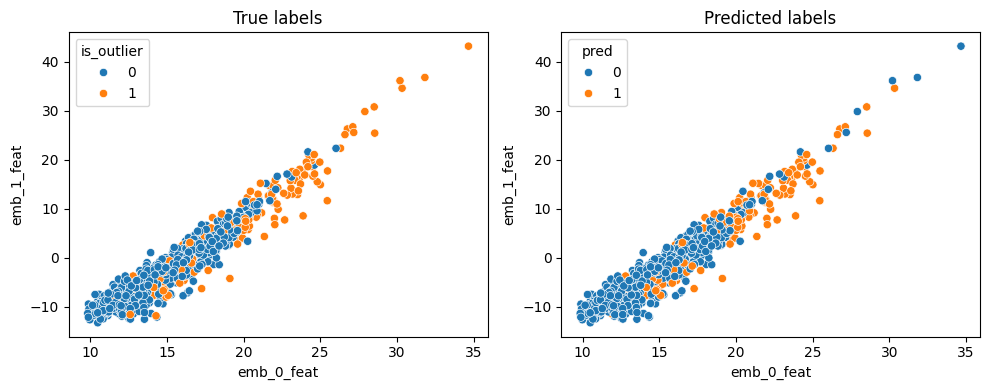

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(x=embeddings.embeddings_df.iloc[:, 1], y=embeddings.embeddings_df.iloc[:, 2], hue=ground_truth_df["is_outlier"], ax=ax[0])
ax[0].set_title("True labels")

sns.scatterplot(x=embeddings.embeddings_df.iloc[:, 1], y=embeddings.embeddings_df.iloc[:, 2], hue=out_df["pred"], ax=ax[1])
ax[1].set_title("Predicted labels")

fig.tight_layout()

/home/quak/miniconda3/envs/neext/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


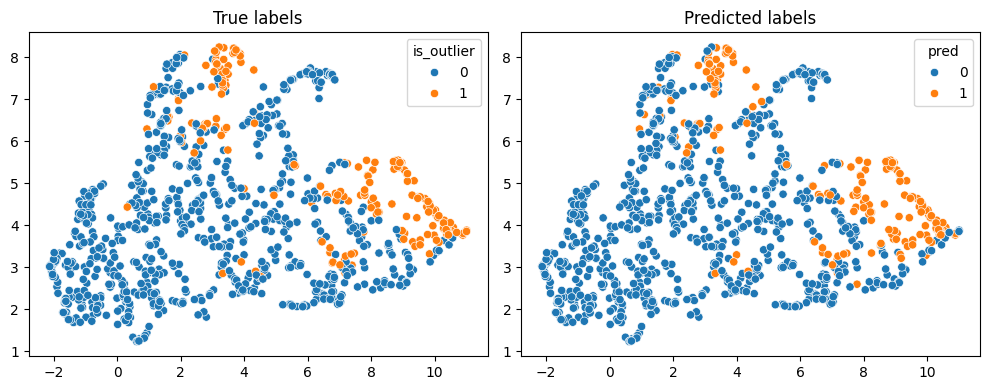

In [ ]:
import umap

reduced = umap.UMAP().fit_transform(embeddings.embeddings_df.iloc[:, 1:])

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=ground_truth_df["is_outlier"], ax=ax[0])
ax[0].set_title("True labels")

sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=out_df["pred"], ax=ax[1])
ax[1].set_title("Predicted labels")

fig.tight_layout()

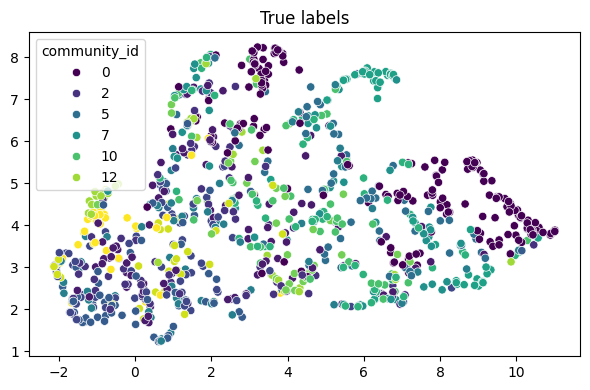

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=features_df["community_id"], ax=ax, palette='viridis')
ax.set_title("True labels")

fig.tight_layout()